## 6.1 目标

* 要理解树数据结构是什么，以及如何使用它。
* 查看树如何用于实现 map 数据结构。
* 使用列表实现树。
* 使用类和引用来实现树。
* 实现树作为递归数据结构。
* 使用堆实现优先级队列。

## 6.2 树的例子

现在我们已经研究了线性数据结构，如栈和队列，并且有一些递归的经验，我们将看一个称为树的常见数据结构。树在计算机科学的许多领域中使用，包括操作系统，图形，数据库系统和计算机网络。树数据结构与他们的植物表亲有许多共同之处。树数据结构具有根，分支和叶。自然界中的树和计算机科学中的树之间的区别在于树数据结构的根在顶部，其叶在底部。

在我们开始研究树形数据结构之前，让我们来看几个常见的例子。

### 第一个例子是生物学的分类树。

Figure1展示了一些动物的生物分类的实例。从这个简单的例子，我们可以了解树的几个属性。

#### 此示例演示的第一个属性是树是分层的。

通过分层，即树的层次结构，更接近顶部的是抽象的东西，底部附近是更具体的东西。层次结构的顶部是Kingdom,树的下一层（上面层的Children）是Phylum,然后是Class,等等。然而，无论分类树有多深，所有的生物依然是animals。

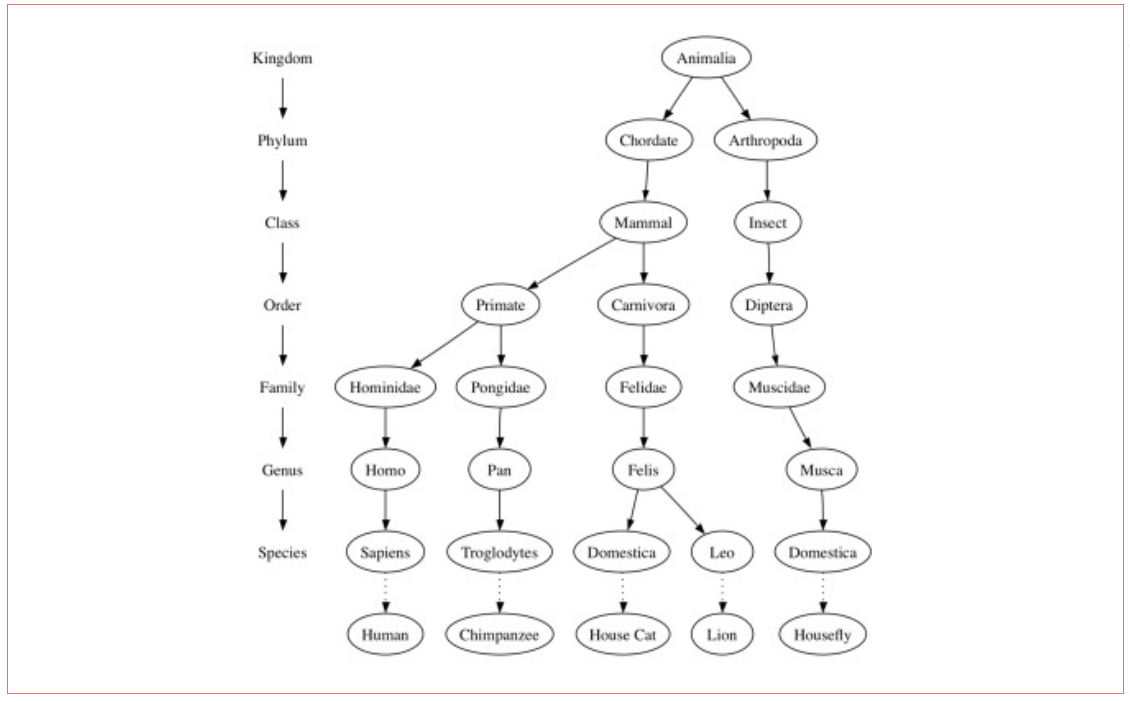
Figure1

注意，你可以从树的顶部开始，并沿着圆圈和箭头一直到底部的路径。在树的每一层，我们可能问自己一个问题，然后遵循与我们答案一致的路径。例如，“这个动物是Chordate（脊椎动物）还是Arthropod(节肢动物)？”如果答案是“Chordate”，那么我们遵循这条路径，问“这个Chordate是Mammal（哺乳动物）吗？”如果不是，我们就卡住了这个简化的实例。当我们在哺乳动物一层时，问“这个动物是Primate(灵长类动物)还是Carnivore(食肉动物)？”我们可以遵循以下路径，直到我们到达树的最底部，在那里我们有共同的名字。

#### 树的第二个属性是一个节点的所有子节点独立于另一个节点的子节点。

例如，Felis 有属于
Domestica 和 Leo 的孩子。Musca 也有一个名为 Domestica 的孩子，但它是一个不同的节
点，并独立于 Felis 的 Domestica孩子。这意味着我们可以改变作为 Musca 的孩子的节点而
不影响 Felis 的孩子。

#### 第三个属性是每个叶节点是唯一的。

我们可以指定从树的根到唯一地识别动物王国中的每个
物种的叶的路径;例如，
Animalia→→Chordate→→Mammal→→Carnivora→→Felidae→→Felis→→Domestica。

### 你可能每天使用的树结构的另一个示例是文件系统。

在文件系统中，目录或文件夹被构造为
树。Figure 2 说明了 Unix文件系统层次结构的一小部分。

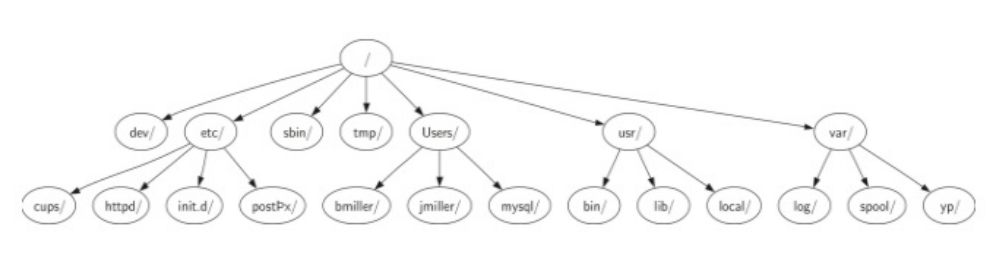
Figure2

文件系统树与生物分类树有很多共同之处。你可以遵循从根目录到任何目录的路径。 该路径
将唯一标识该子目录（及其中的所有文件）。 树的另一个重要属性来源于它们的层次性质，
你可以将树的整个部分（称为子树）移动到树中的不同位置，而不影响层次结构的较低级
别。 例如，我们可以使用整个子树 /etc/，从根节点分离，并重新附加在 usr/ 下。 这将把
httpd 的唯一路径名从 /etc/httpd 更改为 /usr/etc/httpd，但不会影响 httpd 目录的内容或任何
子级。

### 树的最后一个例子是网页。 

以下是使用HTML编写的简单网页的示例。 Figure 3 展示了用于创建页面的每个 HTML 标记的树

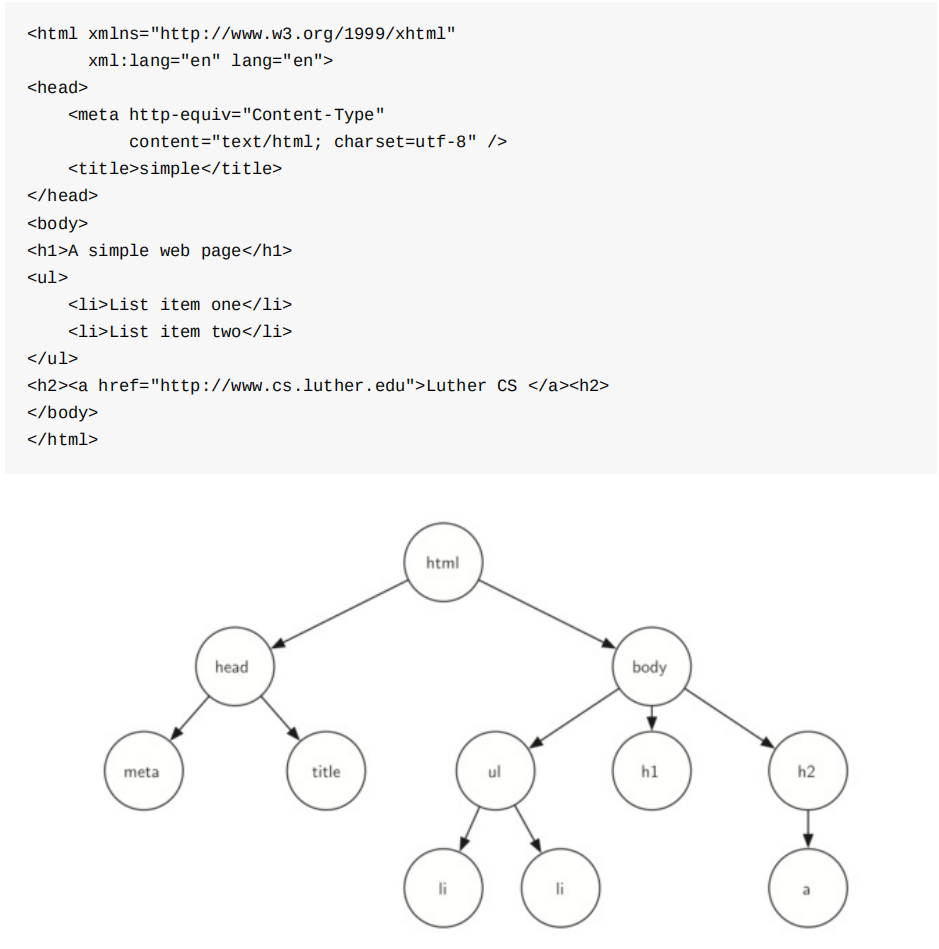
 Figure 3 

HTML源代码和伴随源的树说明了另一个层次结构。请注意，树的每个级别都对应于HTML标
记内的嵌套级别。源中的第一个标记是 ，最后一个是</ html> 页面中的所有其余标记都是成
对的。 如果你检查，你会看到这个嵌套属性在树的所有级别都是 true。

## 6.3.词汇和定义

我们已经看了树的示例，我们将正式定义树及其组件。

#### 节点
节点是树的基本部分。它可以有一个名称，我们称之为“键”，节点也可以有附加信息。我们将这个附加信息称为“有效荷载”。虽然有效荷载信息不是许多树算法的核心，但在利用树的应用中通常是最关键的。

#### 边
边是树的另一个基本部分。边连接两个节点以显示他们之间存在关系。每个节点（除了根之外）都恰好从另一个节点的传入连接。每个节点可以具有多个输出边。

#### 根
树的根是树中唯一没有传入边的节点。在 Figure 2 中，/ 是树的根。

#### 路径
路径是由边连接节点的有序列表。例如，
Mammal→→Carnivora→→Felidae→→Felis→→Domestica是一条路径。

#### 子节点
具有来自相同传入边的节点 c 的集合称为该节点的子节点。在 Figure 2中，节点 log/，spool/
和 yp/ 是节点 var/ 的子节点。


#### 父节点
具有和它相同传入边的所连接的节点称为父节点。在 Figure 2 中，节点 var/ 是节点 log/，
spool/ 和 yp/ 的父节点。

#### 兄弟
树中作为同一父节点的子节点的节点被称为兄弟节点。节点 etc/ 和 usr/ 是文件系统树中的兄
弟节点。

#### 子树
子树是由父节点和该父节点的所有后代组成的一组节点和边

#### 叶节点
叶节点是没有子节点的节点。 例如，人类和黑猩猩是 Figure 1 中的叶节点。


#### 层数
节点 n 的层数为从根结点到该结点所经过的分支数目。 例如，图1中的Felis节点的级别为
五。根据定义，根节点的层数为零。

#### 高度
树的高度等于树中任何节点的最大层数。 Figure 2 中的树的高度是 2。

现在已经定义了基本词汇，我们可以继续对树的正式定义。 事实上，我们将提供一个树的两
个定义。 一个定义涉及节点和边。 第二个定义，将被证明是非常有用的，是一个递归定义。

### 定义一：树由一组节点和一组连接节点的边组成。树具有以下属性：
* 树的一个节点被指定为根节点。
* 除了根节点之外，每个节点 n 通过一个其他节点 p 的边连接，其中 p 是 n 的父节点。
* 从根路径遍历到每个节点路径唯一。
* 如果树中的每个节点最多有两个子节点，我们说该树是一个二叉树。

Figure 3 展示了适合定义一的树。边上的箭头指示连接的方向。


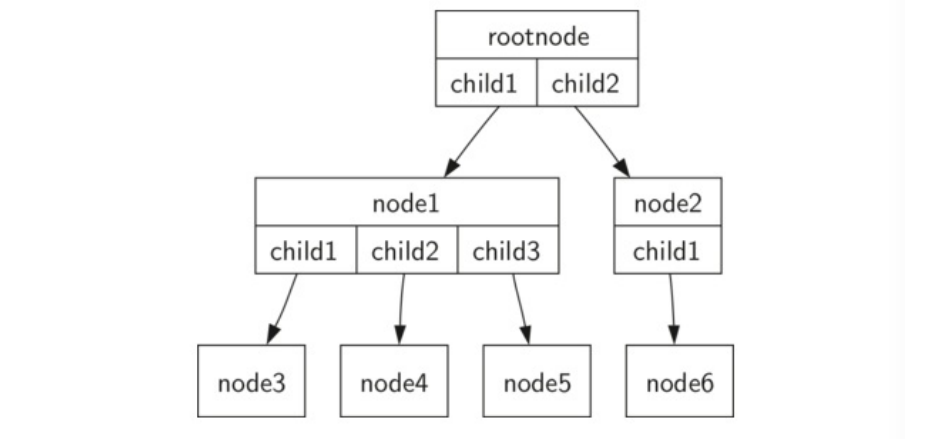
Figure 3 

### 定义二：树是空的，或者由一个根节点和零个或多个子树组成，每个子树也是一棵树。每个子树的根节点通过边连接到父树的根节点。 
Figure 4 说明了树的这种递归定义。使用树的递
归定义，我们知道 Figure 4 中的树至少有四个节点，因为表示一个子树的每个三角形必须有
一个根节点。 它可能有比这更多的节点，但我们不知道，除非我们更深入树。


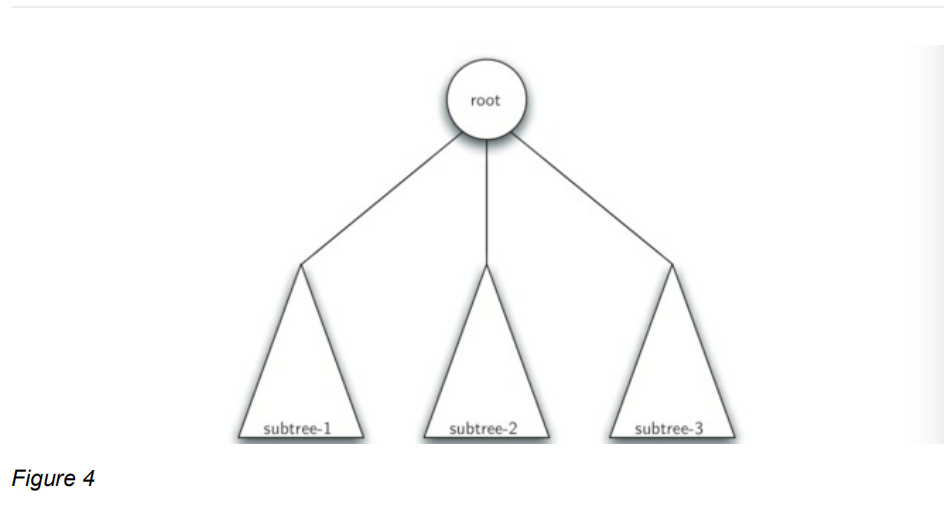

## 6.4.列表表示

在由列表表示的树中，我们将从 Python 的列表数据结构开始，并编写上面定义的函数。虽然
将接口作为一组操作在列表上编写与我们实现的其他抽象数据类型有点不同，但这样做是有
趣的，因为它为我们提供了一个简单的递归数据结构，我们可以直接查看和检查。在列表树
的列表中，我们将根节点的值存储为列表的第一个元素。列表的第二个元素本身将是一个表
示左子树的列表。列表的第三个元素将是表示右子树的另一个列表。为了说明这种存储技
术，让我们看一个例子。 Figure 1 展示了一个简单的树和相应的列表实现。

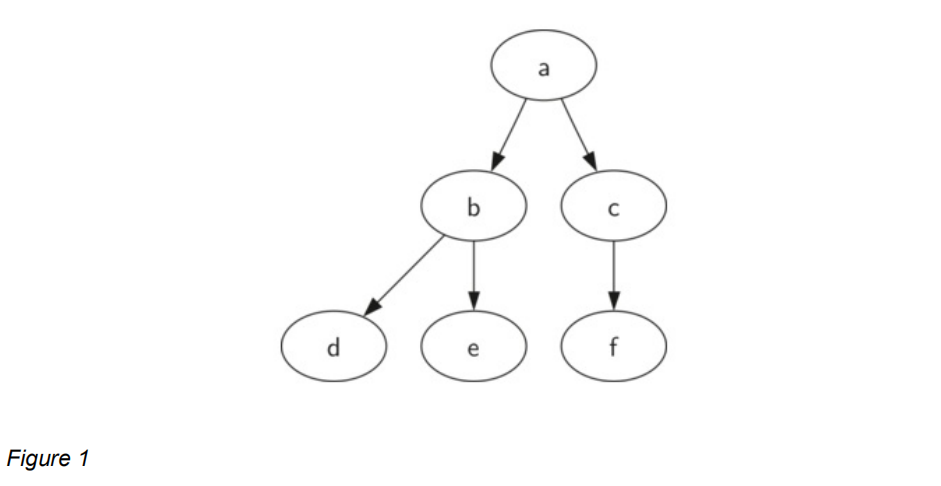

In [2]:
myTree = ['a', # root
         ['b', # left subtrewe
         ['d',[],[]],
         ['e',[],[]]],
         ['c', # right subtree
         ['f',[],[]],
         []]
         ]

注意，我们可以使用标准列表索引来访问列表的子树。树的根是 myTree[0] ，根的左子树是
myTree[1] ，右子树是 myTree[2] 。 ActiveCode 1 说明了使用列表创建一个简单的树。一旦
树被构建，我们可以访问根和左右子树。 该列表方法的一个非常好的属性是表示子树的列表
的结构遵守树定义的结构; 结构本身是递归的！具有根值和两个空列表的子树是叶节点。列表
方法的另一个很好的特性是它可以推广到一个有许多子树的树。在树超过二叉树的情况下，
另一个子树只是另一个列表

In [4]:
# Activecode 1

myTree = ['a', ['b', ['d',[],[]], ['e',[],[]] ], ['c', ['f',[],[]], []] ]
print(myTree)
print('left subtree = ',myTree[1])
print('root = ',myTree[0])
print('right subtreee = ',myTree[2])

['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]
left subtree =  ['b', ['d', [], []], ['e', [], []]]
root =  a
right subtreee =  ['c', ['f', [], []], []]


让我们提供一些使我们能够使用列表作为树的函数来形式化树数据结构的这个定义。注意，
我们不会定义一个二叉树类。我们写的函数只是帮助我们操纵一个标准列表，就像我们正在
使用一棵树。


In [5]:
def BinaryTree(r):
    return [r, [], []]

BinaryTree 函数简单地构造一个具有根节点和两个子列表为空的列表。要将左子树添加到树
的根，我们需要在根列表的第二个位置插入一个新的列表。我们必须小心。如果列表已经在
第二个位置有东西，我们需要跟踪它，并沿着树向下把它作为我们添加的列表的左子节点。
Listing 1 展示了插入左子节点的 Python 代码

In [6]:
# Listing 1

def insertLeft(root,newBranch):
    t = root.pop(1)
    if len(t)>1:
        root.insert(1,[newBranch,t,[]])
    else:
        root.insert(1,[newBranch,[],[]])
    return root

注意，要插入一个左子节点，我们首先获得与当前左子节点对应的（可能为空的）列表后我们添加新的左子树，添加旧的左子数作为新子节点的左子节点。这允许我们在任何将新节点拼接到树中。 insertRight 的代码与 insertLeft 类似，如 Listing 2所

In [8]:
# Listing 2

def insertRight(root,newBranch):
    t = root.pop(2)
    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
    else:
        root.insert(2,[newBranch,[],[]])
    return root

为了完成这组树形函数（见 Listing 3），让我们编写一些访问函数来获取和设置根节点的
值，以及获取左或右子树

In [9]:
# Listing 3

def getRootVal(root):
    return root[0]
def setRootVal(root,newVal):
    root[0] = newVal
def getLeftChild(root):
    return root[1]
def getRightChild(root):
    return root[2]

## 6.5.节点表示


我们的第二种表示树的方法使用节点和引用。在这种情况下，我们将定义一个具有根值属性
的类，以及左和右子树。 由于这个表示更接近于面向对象的编程范例，我们将继续使用这个
表示法用于本章的剩余部分。

使用节点和引用，我们认为树结构类似于 Figure 2 所示。

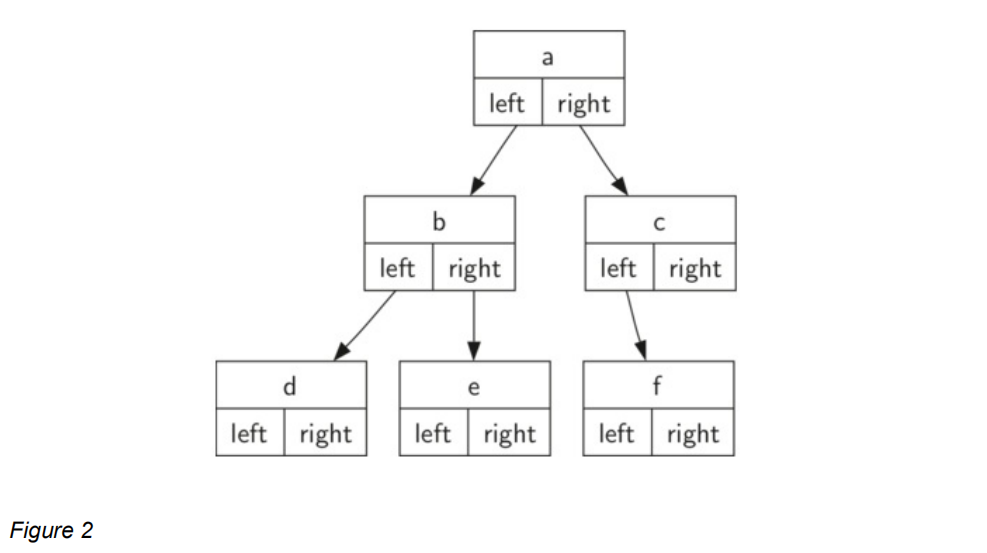

我们将从节点和引用方法的一个简单的类定义开始，如 Listing 4 所示。要记住这个表示重要
的事情是 left 和 right 的属性将成为对 BinaryTree 类的其他实例的引用。 例如，当我
们在树中插入一个新的左子节点时，我们创建另一个 BinaryTree 实例，并在根节点中修
改 self.leftChild 来引用新树节点。

In [11]:
# Listing4

class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

请注意，在 Listing 4 中，构造函数希望获取某种对象存储在根中。 就像你可以在列表中存储
任何你喜欢的对象一样，树的根对象可以是对任何对象的引用。 对于我们的先前示例，我们
将存储节点的名称作为根值。使用节点和引用来表示 Figure 2 中的树，我们将创建
BinaryTree 类的六个实例。

接下来，我们来看看需要构建超出根节点的树的函数。要向树中添加一个左子树，我们将创
建一个新的二叉树对象，并设置根的左边属性来引用这个新对象。 insertLeft 的代码如
Listing 5所示。

In [12]:
# Listing 5

def insertLeft(self,newNode):
    if self.leftChild == None:
        self.leftChild = BinaryTree(newNode)
    else:
        t = BinaryTree(newNode)
        t.leftChild = self.leftChild
        self.leftChild = t

我们必须考虑两种插入情况。 第一种情况的特征没有现有左孩子的节点。当没有左孩子时，
只需向树中添加一个节点。 第二种情况的特征在于具有现有左孩子的节点。在第二种情况
下，我们插入一个节点并将现有的子节点放到树中的下一个层。第二种情况由 Listing 5 第 4
行的 else 语句处理。


insertRight 的代码必须考虑一组对称的情况。没有右孩子，或者我们在根和现有右孩子之
间插入节点。 插入代码如 Listing 6 所示。

In [14]:
# Listing6

def insertRight(self,newNode):
    if self.rightChild == None:
        self.rightChild = BinaryTree(newNode)
    else:
        t = BinaryTree(newNode)
        t.rightChild = self.rightChild
        self.rightChild = t

为了完成一个简单二叉树数据结构的定义，我们将实现获取 左和右孩子（见 Listing 7 ）以及
根值的方法。

In [15]:
# Listing 7

def getRightChild(self):
    return self.rightChild
def getLeftChild(self):
    return self.leftChild
def setRootVal(self,obj):
    self.key = obj
def getRootVal(self):
    return self.key

现在我们有了创建和操作二叉树的所有部分，让我们使用它们来检查结构。 我们使用节点 a
作为根的简单树，并将节点 b 和 c 添加为子节点。 ActiveCode 1 创建树并查看存储在 key，
left 和 right 中的一些值。注意，根的左和右孩子本身是 BinaryTree 类的不同实例。正如我们
在对树的原始递归定义中所说的，这允许我们将二叉树的任何子项视为二叉树本身。

In [52]:
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None
        
    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
        
    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t
    
    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild
    
    def setRootVal(self,obj):
        self.key = obj
    
    def getRootVal(self):
        return self.key


In [53]:
r = BinaryTree('a')
print(r.getRootVal())
print(r.getLeftChild())

a
None


In [54]:
r.insertLeft('b')
print(r.getLeftChild())
print(r.getLeftChild().getRootVal())

b


In [55]:
r.insertRight('c')
print(r.getRightChild())
print(r.getRightChild().getRootVal())

c


In [56]:
r.getRightChild().setRootVal('hello')
print(r.getRightChild().getRootVal())

hello
